## Pravdepodobnostné prístupy a Bayesovská klasifikácia

V tomto notebooku sa naučíme o:
- **Bayesova veta** – princíp v oblasti pravdepodobnosti a štatistiky, ukážeme teóriu aj praktický príklad
- **Naivný Bayesov klasifikátor** – jednoduchý, no výkonný pravdepodobnostný model na klasifikáciu ako formu strojového učenia

## Bayesova veta - teória

- Bayesova veta umožňuje vypočítať pravdepodobnosť určitej hypotézy (A) na základe pozorovaných dôkazov (B)

Matematický zápis Bayesovej vety:
$$
P(A \mid B) = \frac{P(B \mid A) \ \cdot P(A)}{P(B)}
$$

- P(X): Pravdepodobnosť udalosti (X), bez ohľadu na (Y)
- P(X | Y): Pravdepodobnosť pozorovania udalosti(X), za predpokladu že (Y) nastalo

## Bayesova veta - praktický príklad
### Diagnostický test na chorobu

Poznáme:
- koľko % z celkovej populácie má chorobu
- koľko % infikovaných osôb má pozitívny test
- koľko % zdravých osôb má pozitívny test - falošne pozitívny

Úloha: 
- ak je test pozitívny, aká je pravdepodobnosť že osoba je skutočne infikovaná?

Bayesov vzorec pre túto úlohu bude mať tvar:
$$
P(Infikovaný \mid Pozitívny) = \frac{P(Pozitívny \mid Infikovaný) \  P(Infikovaný)}{P(Pozitívny)}
$$


In [ ]:
# Zadanie vstupov
P_population_infected = float(input("Koľko % z celkovej populácie má chorobu? "))
P_positive_given_infected = float(input("Koľko % infikovaných osôb má pozitívny test? "))
P_positive_given_healthy = float(input("Koľko % zdravých osôb má pozitívny test? "))

# Výpočet doplnkových pravdepodobností
P_population_healthy = 1 - P_population_infected
P_negative_given_infected = 1 - P_positive_given_infected
P_negative_given_healthy = 1 - P_positive_given_healthy


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [24]:
# Výpisanie vstupov pre úlohu

print("\nTabuľka zadaných a odvodených pravdepodobností:\n")
print(f"P(Infikovaný)                = ({P_population_infected*100:.2f}%)")
print(f"P(Zdravý)                    = ({P_population_healthy*100:.2f}%)")
print(f"P(Pozitívny | Infikovaný)    = ({P_positive_given_infected*100:.2f}%)")
print(f"P(Negatívny | Infikovaný)    = ({P_negative_given_infected*100:.2f}%)")
print(f"P(Pozitívny | Zdravý)        = ({P_positive_given_healthy*100:.2f}%)")
print(f"P(Negatívny | Zdravý)        = ({P_negative_given_healthy*100:.2f}%)")


Tabuľka zadaných a odvodených pravdepodobností:

P(Infikovaný)                = (10.00%)
P(Zdravý)                    = (90.00%)
P(Pozitívny | Infikovaný)    = (99.00%)
P(Negatívny | Infikovaný)    = (1.00%)
P(Pozitívny | Zdravý)        = (20.00%)
P(Negatívny | Zdravý)        = (80.00%)


In [25]:
# Výpočet pravdepodobnosti pozitívnch testov
P_positive = (P_positive_given_infected * P_population_infected + P_positive_given_healthy * P_population_healthy)
print(f"Celková pravdepodobnosť pozitívneho testu je: {P_positive:.2%}") 

# Výpočet pravdepodobnosti infikovanej osoby po pozitínom test
P_infected_given_positive = (P_positive_given_infected * P_population_infected) / P_positive
print(f"Pravdepodobnosť, že osoba je infikovaná po pozitívnom teste: {P_infected_given_positive:.2%}") 

Celková pravdepodobnosť pozitívneho testu je: 27.90%
Pravdepodobnosť, že osoba je infikovaná po pozitívnom teste: 35.48%


## Naivný Bayesov klasifikátor – teória

- je **pravdepodobnostný model** používaný na klasifikáciu dát, ktorý teoreticky vychádza z Bayesovej vety

Hlavná myšlienka:
- predpokladáme, že všetky **atribúty (vlastnosti) sú navzájom nezávislé**
- tento predpoklad je veľmi silný a „naivný“, ale  v praxi často funguje až prekvapivo dobre
- odhaduje pravdepodobnosť, že daný vzor **patrí do určitej triedy**, a pri klasifikácií vyberá triedu s najvyššou pravdepodobnosťou

---

### Bayesova veta pre klasifikáciu

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

Kde:  
- $P(C \mid X)$ – posterior pravdepodobnosť, že vzor $X$ patrí do triedy $C$  
- $P(C)$ – prior pravdepodobnosť triedy $C$  
- $P(X \mid C)$ – pravdepodobnosť vidieť vzor $X$, ak je z triedy $C$  
- $P(X)$ – evidence (celková pravdepodobnosť vzoru $X$)  

---

### Naivný predpoklad

- naivný Bayesov klasifikátor predpokladá **nezávislosť atribútov**:

$$
P(X \mid C) \approx \prod_{i=1}^{n} P(x_i \mid C)
$$

- pri klasifikácií výber triedy s najvyššou pravdepodobnosťou:

$$
C_{\text{predicted}} = \arg \max \big( P(X \mid C) \cdot P(C) \big)
$$


## Naivný Bayesov klasifikátor – praktický príklad
### Klasifikácia kvetov

- použijeme naivný Bayesov klasifikátor na klasifikáciu kvetov do jednotlivých druhov na základe ich vlastností
- algoritmus sa naučí typické hodnoty vlastností pre druhy kvetov z dát a použije tieto znalosti na predikciu druhu neznámych kvetov

Vlastnosti:
- dĺžka okvetného listu
- šírka okvetného listu

Triedy:
- setosa
- versicolor
- virginica

In [2]:
# Importovanie

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Načítanie dát pre model

data = load_iris()
X = data.data[:, :2]
y = data.target
target_names = data.target_names
print(f"Počet vzoriek: {X.shape[0]}")

Počet vzoriek: 150


In [5]:
# Rozdelenie dát na trénovaciu a testovaciu množinu

trainSize = float(input("Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.  "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - trainSize, random_state=42)

Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.   0.5


In [6]:
# Trénovanie modelu na trénovacej množine
model = GaussianNB()
model.fit(X_train, y_train)

# Testovanie klasifikácie modelu na testovacej množine
y_pred = model.predict(X_test)

## Interpretácia výsledkov modelu
### Na interpretáciu využijeme
- presnosť
- matica zámen
- rozhodovacie hranice
- pravdepodobnosti tried pre jednotlivé vzorky
- hustotu pravdepodobnosti pre jednotlivé atribúty

### Presnosť
- vyjadruje ako presne model dokázal klasifikovať vzorky do tried
- rozsah od 0 do 1, pričom 1 znamená úplnú presnosť

In [7]:
acc = accuracy_score(y_test, y_pred)
print(f"Presnosť: {acc:.2f}")

Presnosť: 0.80


### Matica zámen
- matica zámen zobrazuje počty správnych a nesprávnych predikcií pre jednotlivé triedy
- najväčšie čísla na diagonále znamenajú lepšiu presnosť modelu
- takisto je možné zistiť, ktoré triedy si model najčastejšie zamieňal medzi sebou, ako aj ktoré triedy dokázal rozpoznávať najpresnejšie

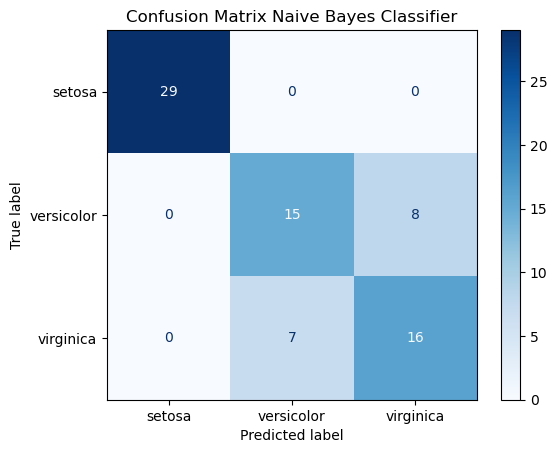

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Naive Bayes Classifier")
plt.show()

### Rozhodovacie hranice
- zobrazujú, ako model rozdeľuje priestor vstupných údajov medzi jednotlivé triedy, teda kde presne prechádza hranica medzi oblasťami tried

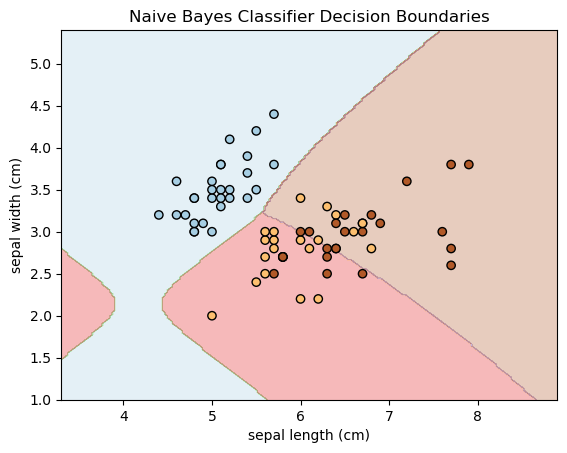

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Naive Bayes Classifier Decision Boundaries")
plt.show()

### Pravdepodobnosti jednotlivych tried
- vyjadrujú, s akou pravdepodobnosťou model priraďuje vzorku k danej triede
- súčet pravdepodobností všetkých tried pre jednu vzorku je vždy rovný 1

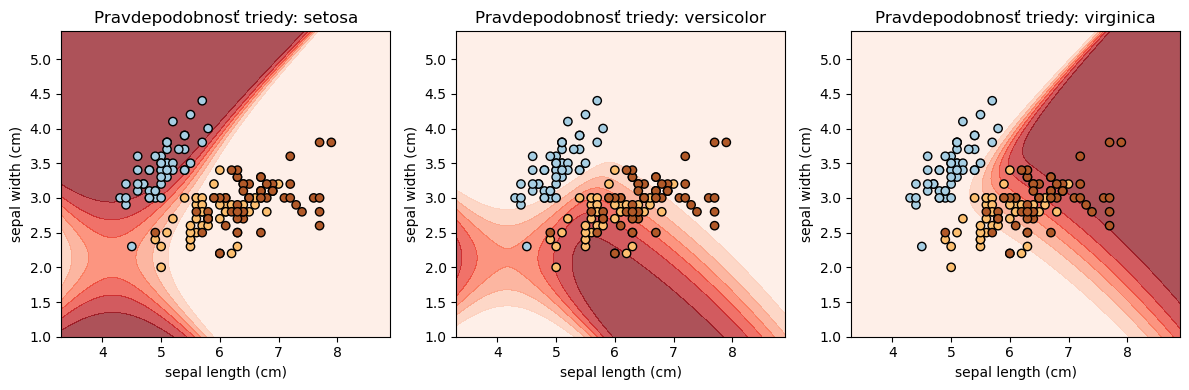

In [10]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(12,4))
for i, class_name in enumerate(target_names):
    plt.subplot(1,3,i+1)
    Z = probs[:, i].reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.Reds)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(f"Pravdepodobnosť triedy: {class_name}")
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])

plt.tight_layout()
plt.show()

## Hustota
- krivky znázorňujú rozloženie hodnôt atribútu pre jednotlivé triedy
- ak sa krivky prekrývajú málo, atribút dobre rozlišuje triedy, pri silnom prekrývaní je jeho rozlišovacia schopnosť menšia
- graf vizualizuje pravdepodobnosť, že bod patrí do konkrétnej triedy, čo pomáha pochopiť, ako naivný Bayes využije atribút pri klasifikácii

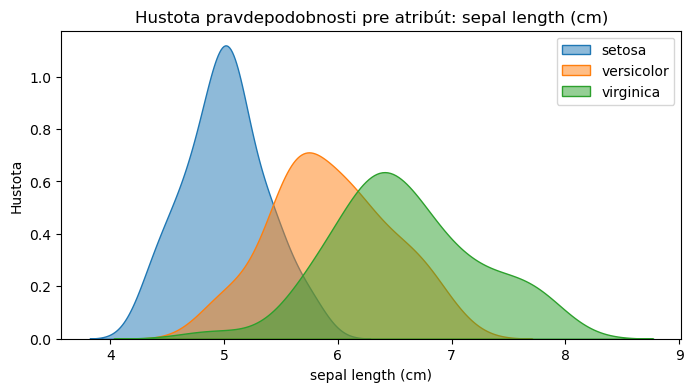

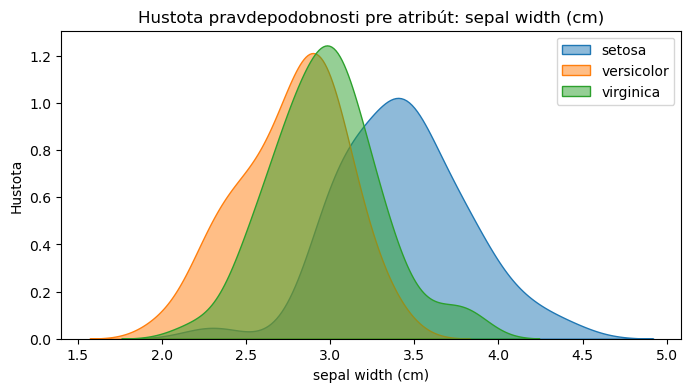

In [12]:
for i, feature in enumerate(data.feature_names[:2]):
    plt.figure(figsize=(8,4))
    for class_idx, class_name in enumerate(data.target_names):
        sns.kdeplot(X[y == class_idx, i], label=f'{class_name}', fill=True, alpha=0.5)
    plt.title(f"Hustota pravdepodobnosti pre atribút: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Hustota")
    plt.legend()
    plt.show()